In [1]:
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats
import datetime
import calendar

# Visualisasi Data
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning dan Pemodelan
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')

In [3]:
# Menampilkan semua kolom dalam DataFrame
pd.set_option("display.max.columns", None)
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,15436653

In [4]:
# Menampilkan 6 baris paling atas
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [5]:
# Menampilkan 6 baris paling bawah
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [6]:
# Melihat dimensi atau jumlah total baris dan kolom dalam kumpulan data menggunakan .shape
df.shape

(693071, 57)

In [7]:
# Melihat informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [8]:
df.columns.values

array(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'short_summary',
       'long_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime',
       'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperat

In [9]:
ex_col = ['timezone', 'product_id', 'apparentTemperature', 'precipIntensity', 'humidity', 'windSpeed',
          'windGust', 'windGustTime', 'visibility', 'temperatureHighTime', 'temperatureLowTime', 'apparentTemperatureHigh',
          'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime','dewPoint', 'windBearing',
          'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
          'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime',
          'apparentTemperatureMax', 'apparentTemperatureMaxTime']
df_1 = df.drop(ex_col, axis=1)
df_1

,id,timestamp,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,temperature,short_summary,long_summary,precipProbability,temperatureHigh,temperatureLow,icon,pressure,temperatureMin,temperatureMax
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,Mostly Cloudy,Rain throughout the day.,0.0,43.68,34.19,partly-cloudy-night,1021.98,39.89,43.68
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,Rain,"Rain until morning, starting again in the eve...",1.0,47.30,42.10,rain,1003.97,40.49,47.30
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,Clear,Light rain in the morning.,0.0,47.55,33.10,clear-night,992.28,35.36,47.55
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,Clear,Partly cloudy throughout the day.,0.0,45.03,28.90,clear-night,1013.73,34.67,45.03
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,Partly Cloudy,Mostly cloudy throughout the day.,0.0,42.18,36.71,partly-cloudy-night,998.36,33.10,42.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,44.76,34.83,partly-cloudy-night,1023.57,31.42,44.76
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,UberX,9.5,1.00,1.0,42.3519,-71.0643,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,44.76,34.83,partly-cloudy-night,1023.57,31.42,44.76
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,Taxi,NaN,1.00,1.0,42.3519,-71.0643,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,44.76,34.83,partly-cloudy-night,1023.57,31.42,44.76
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,Black SUV,27.0,1.00,1.0,42.3519,-71.0643,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,44.76,34.83,partly-cloudy-night,1023.57,31.42,44.76


In [10]:
# Melihat dimensi atau jumlah total baris dan kolom dalam kumpulan data menggunakan .shape
df_1.shape

(693071, 25)

## Cleaning Data

In [11]:
# Menampilkan apakah di setiap attribute ada missing value dengan tampilan boolean (true/false)
df_1.isnull().any()

id                   False
timestamp            False
hour                 False
day                  False
month                False
datetime             False
source               False
destination          False
cab_type             False
name                 False
price                 True
distance             False
surge_multiplier     False
latitude             False
longitude            False
temperature          False
short_summary        False
long_summary         False
precipProbability    False
temperatureHigh      False
temperatureLow       False
icon                 False
pressure             False
temperatureMin       False
temperatureMax       False
dtype: bool

In [12]:
# Memeriksa missing values pada setiap kolom
df_1.columns[df_1.isnull().any()]

Index(['price'], dtype='object')

In [13]:
# Menampilkan jumlah missing value pada dataset
df_1.isnull().sum()

id                       0
timestamp                0
hour                     0
day                      0
month                    0
datetime                 0
source                   0
destination              0
cab_type                 0
name                     0
price                55095
distance                 0
surge_multiplier         0
latitude                 0
longitude                0
temperature              0
short_summary            0
long_summary             0
precipProbability        0
temperatureHigh          0
temperatureLow           0
icon                     0
pressure                 0
temperatureMin           0
temperatureMax           0
dtype: int64

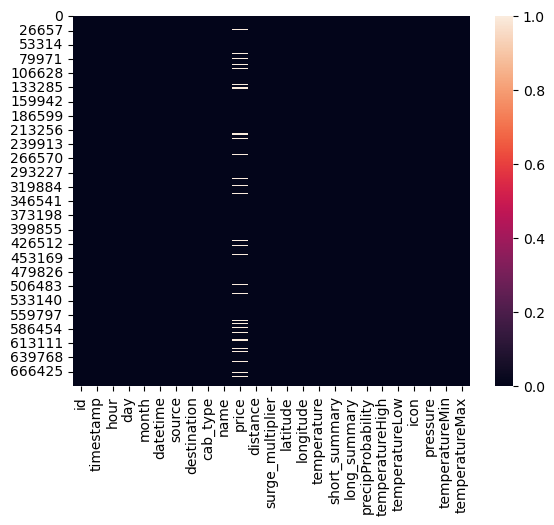

In [14]:
sns.heatmap(df_1.isnull())
plt.show()

In [15]:
# Mengetahui persentase missing value
miss=df_1.isnull().sum()/len(df_1)*100
miss=miss[miss>0]
miss

price    7.949402
dtype: float64

In [16]:
# Menghapus missing value
df_1.dropna(inplace=True)

In [17]:
# Memeriksa kembali missing values pada setiap kolom
df_1.isnull().sum()

id                   0
timestamp            0
hour                 0
day                  0
month                0
datetime             0
source               0
destination          0
cab_type             0
name                 0
price                0
distance             0
surge_multiplier     0
latitude             0
longitude            0
temperature          0
short_summary        0
long_summary         0
precipProbability    0
temperatureHigh      0
temperatureLow       0
icon                 0
pressure             0
temperatureMin       0
temperatureMax       0
dtype: int64

In [18]:
# Melihat kembali informasi dari dataset
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 637976 non-null  object 
 1   timestamp          637976 non-null  float64
 2   hour               637976 non-null  int64  
 3   day                637976 non-null  int64  
 4   month              637976 non-null  int64  
 5   datetime           637976 non-null  object 
 6   source             637976 non-null  object 
 7   destination        637976 non-null  object 
 8   cab_type           637976 non-null  object 
 9   name               637976 non-null  object 
 10  price              637976 non-null  float64
 11  distance           637976 non-null  float64
 12  surge_multiplier   637976 non-null  float64
 13  latitude           637976 non-null  float64
 14  longitude          637976 non-null  float64
 15  temperature        637976 non-null  float64
 16  sh

In [19]:
# melihat apakah ada data duplikat pada dataset
df_1.duplicated().sum()

0

In [20]:
# Memeriksa data yang duplikat pada setiap kolom
sum(df_1.duplicated(df_1.columns))

0

## Explore Data

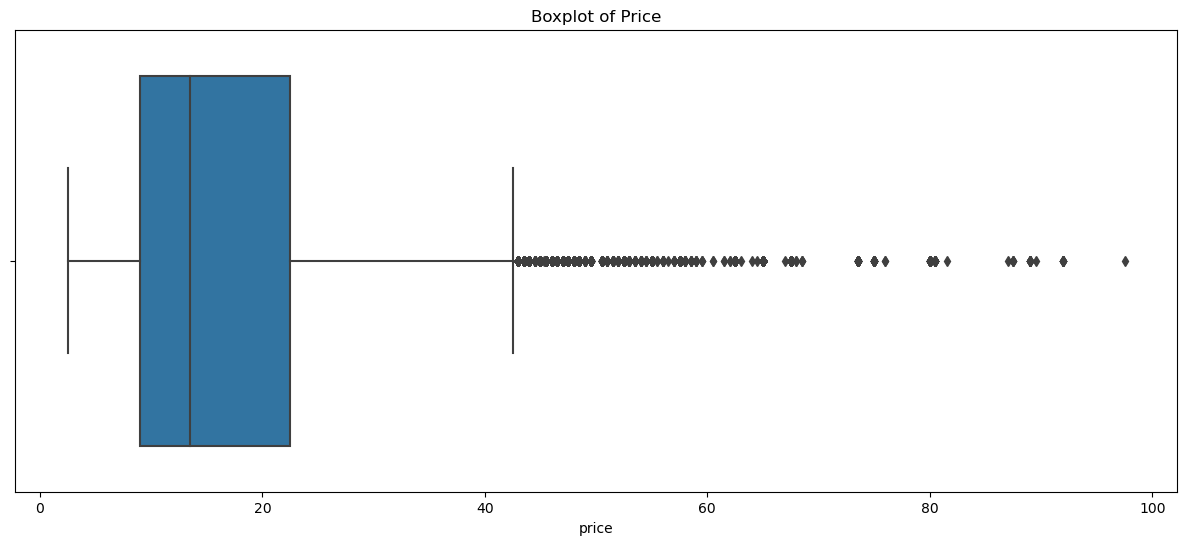

In [21]:
plt.figure(figsize=(15,6))

sns.boxplot(x='price', data=df_1)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Price')
plt.show()

In [22]:
# Menghitung nilai Q1, Q3, dan IQR dari kolom Sale Price

Q1 = df_1['price'].quantile(0.25)
Q3 = df_1['price'].quantile(0.75)
IQR = Q3 - Q1

min_IQR = Q1 - (1.5*IQR) # Lower
max_IQR = Q3 + (1.5*IQR) # Upper

outliers_upper = df_1['price'][(df_1['price'] > max_IQR)]
outliers_lower = df_1['price'][(df_1['price'] < min_IQR)]
jumlah_outlier = outliers_lower.size + outliers_upper.size
persentase_outlier = (jumlah_outlier / df_1['price'].size) * 100

print('Q1 = ', Q1)
print('Q3 = ', Q3)
print('IQR Price = ', IQR)
print("Batas Bawah Outlier: ", min_IQR)
print("Batas Atas Outlier: ", max_IQR)
print("Total Outlier: ", jumlah_outlier)
print("% Outlier: ", persentase_outlier)

Q1 =  9.0
Q3 =  22.5
IQR Price =  13.5
Batas Bawah Outlier:  -11.25
Batas Atas Outlier:  42.75
Total Outlier:  5589
% Outlier:  0.8760517637027099


In [23]:
# Menghapus data outliers

print('Jumlah baris data sebelum data outlier dihapus: ',df_1.shape[0])
df_1 = df_1.loc[df_1['price'] < max_IQR]
df_1 = df_1.loc[df_1['price'] > min_IQR]

print('Jumlah baris data setelah data outlier dihapus: ',df_1.shape[0])

Jumlah baris data sebelum data outlier dihapus:  637976


Jumlah baris data setelah data outlier dihapus:  632387


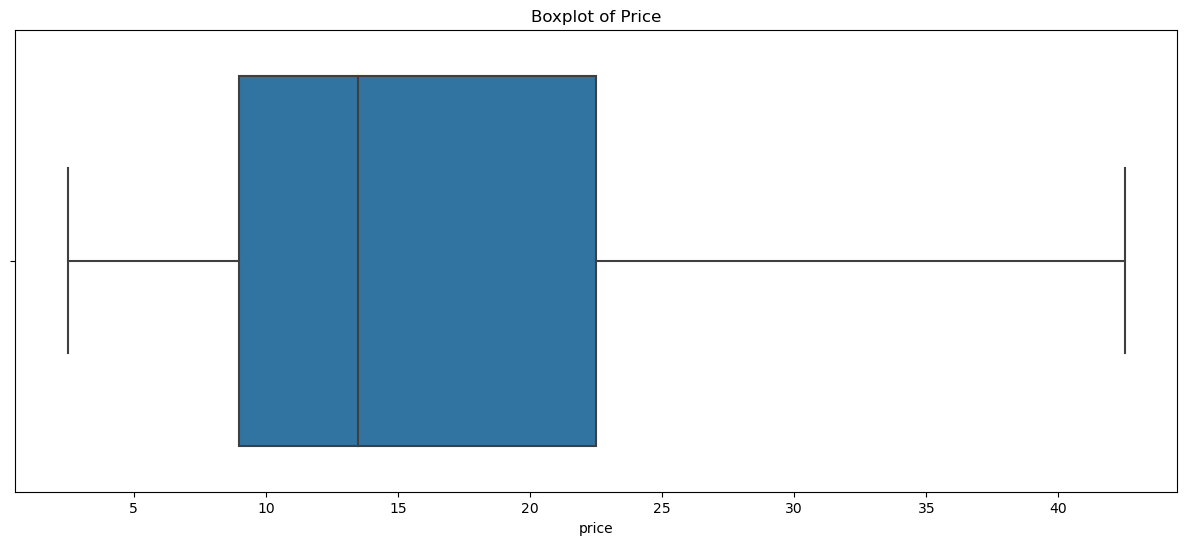

In [24]:
plt.figure(figsize=(15,6))

sns.boxplot(x='price', data=df_1)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Price')
plt.show()

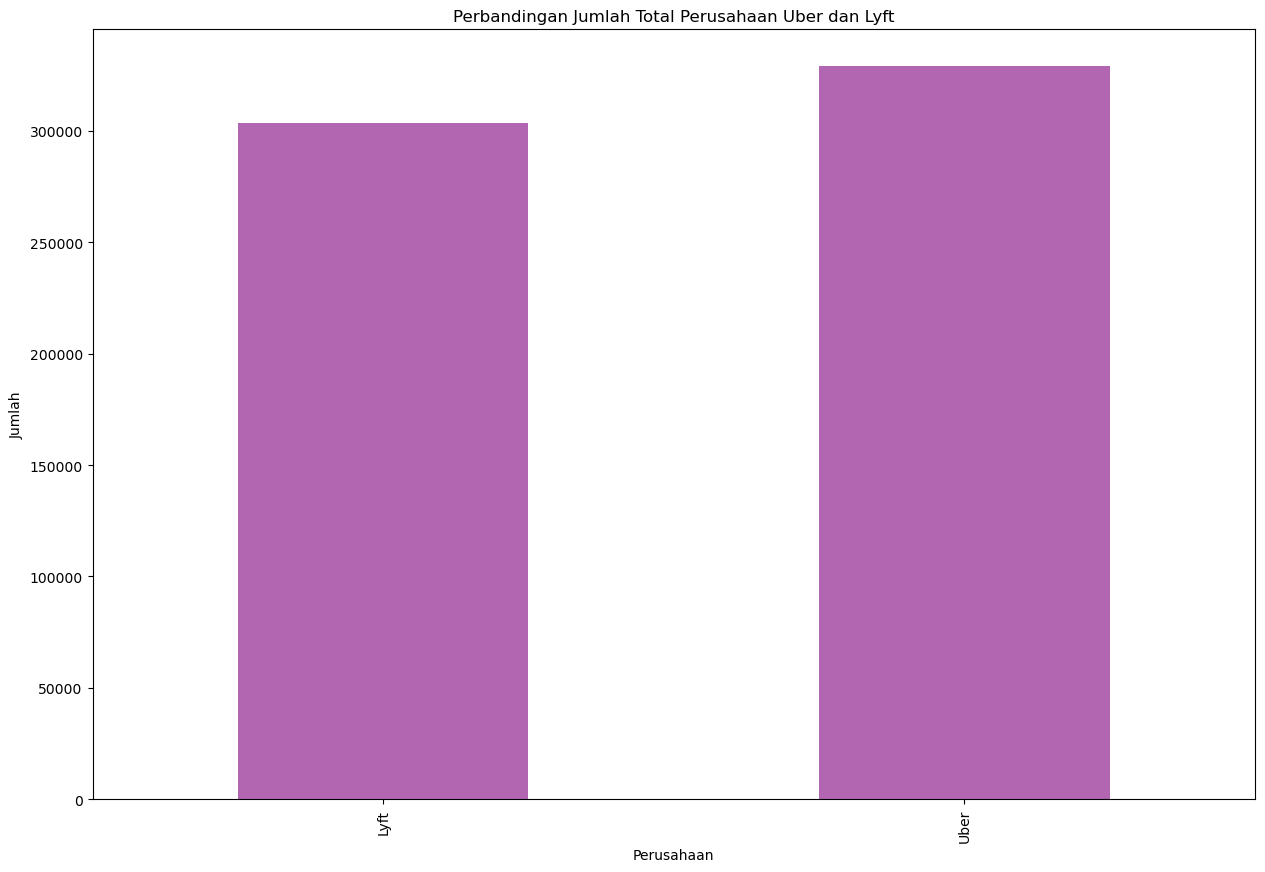

In [25]:
# Menghitung jumlah total perusahaan Uber dan Lyft
counts = df_1.groupby('cab_type')['cab_type'].count()

# Menampilkan grafik bar
counts.plot(kind = 'bar', figsize=(15,10), color = 'purple', alpha=0.6)
plt.title('Perbandingan Jumlah Total Perusahaan Uber dan Lyft')
plt.xlabel('Perusahaan')
plt.ylabel('Jumlah')

plt.show()

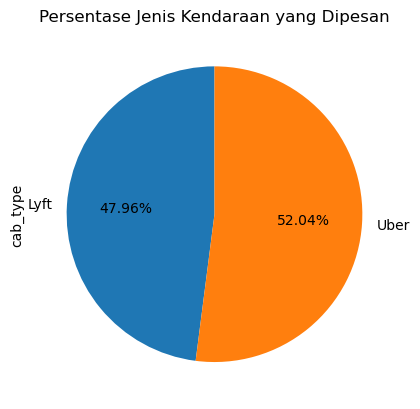

In [26]:
counts.plot(kind='pie',
            autopct='%1.2f%%',
            startangle = 90)
plt.title('Persentase Jenis Kendaraan yang Dipesan')
plt.show()

In [27]:
# Memfilter kategori Lyft dan Uber berdasarkan kolom cab_type
lyft = df_1[df_1['cab_type'] == 'Lyft']
uber = df_1[df_1['cab_type'] == 'Uber']

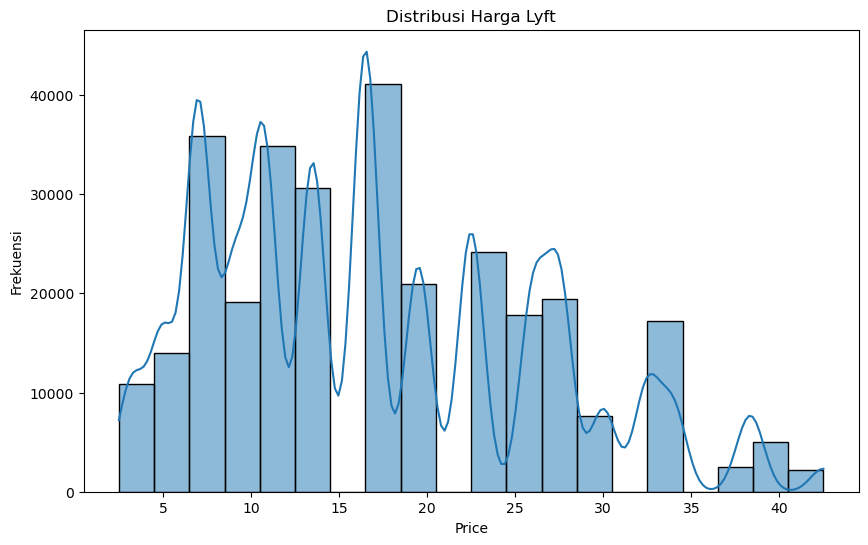

In [28]:
# Mengatur ukuran gambar untuk plot
plt.figure(figsize=(10, 6))

# Membuat histogram distribusi harga menggunakan seaborn
sns.histplot(data=lyft, x='price', bins=20, kde=True)

# Menambahkan judul plot
plt.title('Distribusi Harga Lyft')

# Menambahkan label sumbu x
plt.xlabel('Price')

# Menambahkan label sumbu y
plt.ylabel('Frekuensi')

# Menampilkan plot histogram
plt.show()

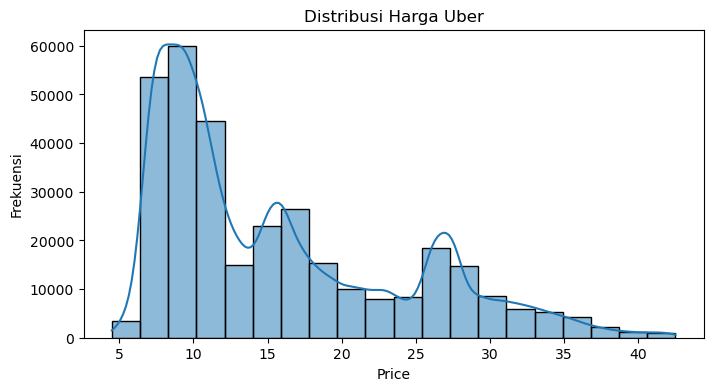

In [29]:
# Mengatur ukuran gambar untuk plot
plt.figure(figsize=(8, 4))

# Membuat histogram distribusi harga menggunakan seaborn
sns.histplot(data=uber, x='price', bins=20, kde=True)

# Menambahkan judul plot
plt.title('Distribusi Harga Uber')

# Menambahkan label sumbu x
plt.xlabel('Price')

# Menambahkan label sumbu y
plt.ylabel('Frekuensi')

# Menampilkan plot histogram
plt.show()

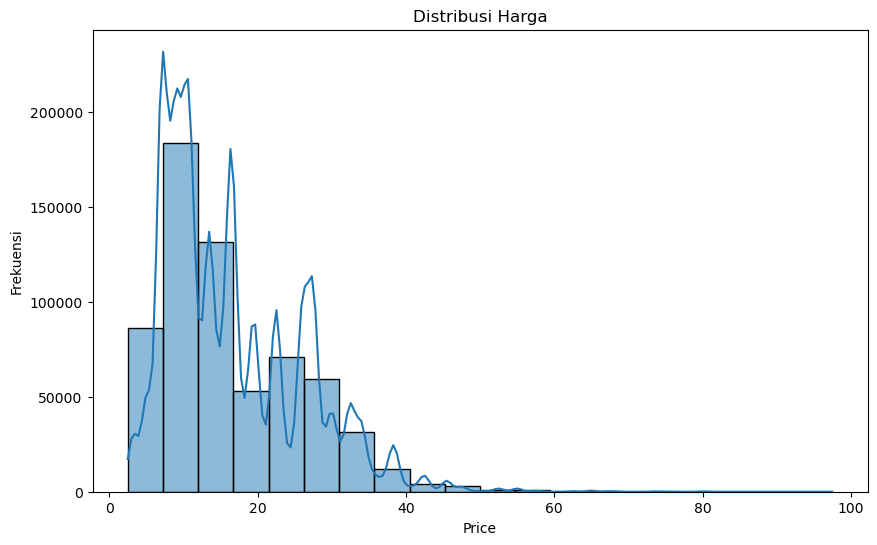

In [30]:
# Mengatur ukuran gambar untuk plot
plt.figure(figsize=(10, 6))

# Membuat histogram distribusi harga menggunakan seaborn
sns.histplot(data=df, x='price', bins=20, kde=True)

# Menambahkan judul plot
plt.title('Distribusi Harga')

# Menambahkan label sumbu x
plt.xlabel('Price')

# Menambahkan label sumbu y
plt.ylabel('Frekuensi')

# Menampilkan plot histogram
plt.show()

In [31]:
lyft

,id,timestamp,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,temperature,short_summary,long_summary,precipProbability,temperatureHigh,temperatureLow,icon,pressure,temperatureMin,temperatureMax
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,Mostly Cloudy,Rain throughout the day.,0.0,43.68,34.19,partly-cloudy-night,1021.98,39.89,43.68
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,Rain,"Rain until morning, starting again in the eve...",1.0,47.30,42.10,rain,1003.97,40.49,47.30
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,Clear,Light rain in the morning.,0.0,47.55,33.10,clear-night,992.28,35.36,47.55
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,Clear,Partly cloudy throughout the day.,0.0,45.03,28.90,clear-night,1013.73,34.67,45.03
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,Partly Cloudy,Mostly cloudy throughout the day.,0.0,42.18,36.71,partly-cloudy-night,998.36,33.10,42.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693042,086e7cda-2b2d-4736-9d5f-0cd234e04e63,1.543453e+09,1,29,11,2018-11-29 01:03:40,Theatre District,Fenway,Lyft,Lyft XL,16.5,3.11,1.0,42.3647,-71.0542,38.42,Mostly Cloudy,Mostly cloudy throughout the day.,0.0,42.61,37.60,partly-cloudy-night,996.92,33.85,42.61
693043,177a946d-c7c8-4334-a97a-a8a48efb1bc0,1.543453e+09,1,29,11,2018-11-29 01:03:40,Theatre District,Fenway,Lyft,Lux,22.5,3.11,1.0,42.3647,-71.0542,38.42,Mostly Cloudy,Mostly cloudy throughout the day.,0.0,42.61,37.60,partly-cloudy-night,996.92,33.85,42.61
693048,871dc1be-d51e-4334-9217-1a6cd00d5058,1.543456e+09,1,29,11,2018-11-29 01:47:08,Theatre District,Fenway,Lyft,Shared,7.0,3.11,1.0,42.3647,-71.0542,38.42,Mostly Cloudy,Mostly cloudy throughout the day.,0.0,42.61,37.60,partly-cloudy-night,996.92,33.85,42.61
693051,aa4e5808-7357-49d3-b539-bd04d4815665,1.543456e+09,1,29,11,2018-11-29 01:47:08,Theatre District,Fenway,Lyft,Lyft,10.5,3.11,1.0,42.3647,-71.0542,38.42,Mostly Cloudy,Mostly cloudy throughout the day.,0.0,42.61,37.60,partly-cloudy-night,996.92,33.85,42.61


<Axes: ylabel='Frequency'>

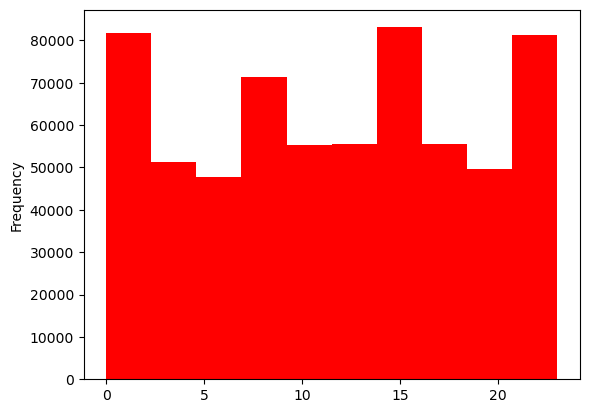

In [32]:
df_1['hour'].plot(kind='hist', color='red',)

<Axes: ylabel='Frequency'>

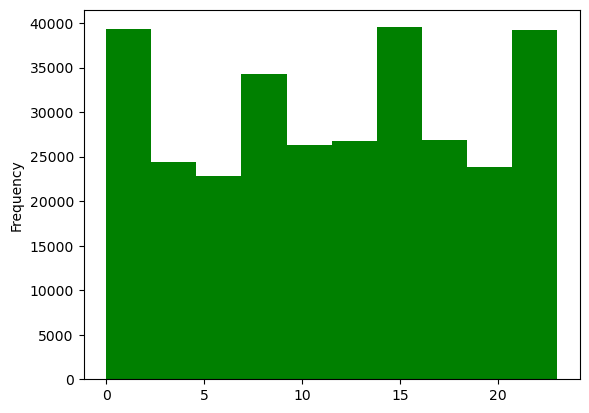

In [33]:
lyft['hour'].plot(kind='hist', color='green')

<Axes: ylabel='Frequency'>

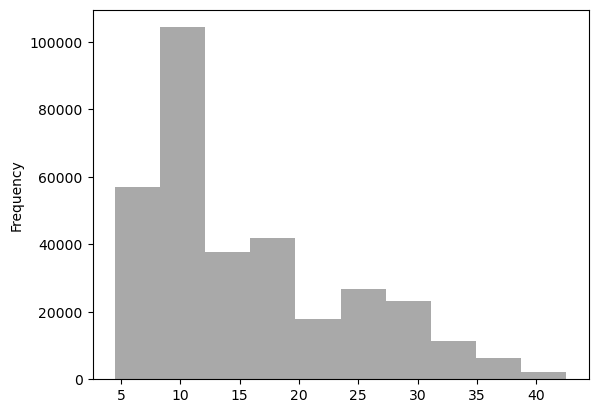

In [34]:
uber['price'].plot(kind='hist', color='darkgrey')

In [35]:
df_1['price'].value_counts()

7.00     52314
16.50    44351
10.50    40590
13.50    33707
9.00     30884
         ...  
7.98         1
8.35         1
11.60        1
9.35         1
19.35        1
Name: price, Length: 89, dtype: int64

Text(0.5, 1.0, 'Number of Trips vs Days')

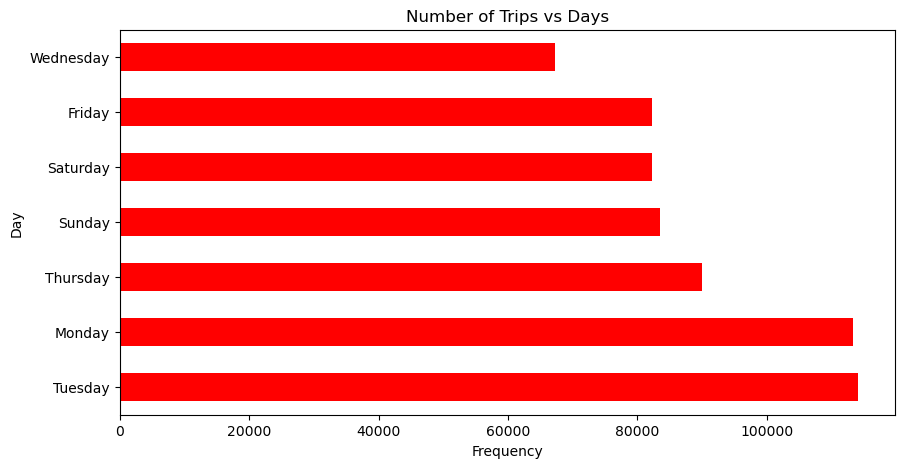

In [36]:
day_week = [calendar.day_name[x.dayofweek] for x in
            pd.to_datetime(df_1['datetime'], format='%Y/%m/%d %H:%M:%S')]
day_week = pd.Series(day_week)

days = day_week.value_counts()
days.plot(kind='barh', color='red', figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Day')
plt.title('Number of Trips vs Days')

Text(0.5, 1.0, 'Number of Trips vs Days (LYFT)')

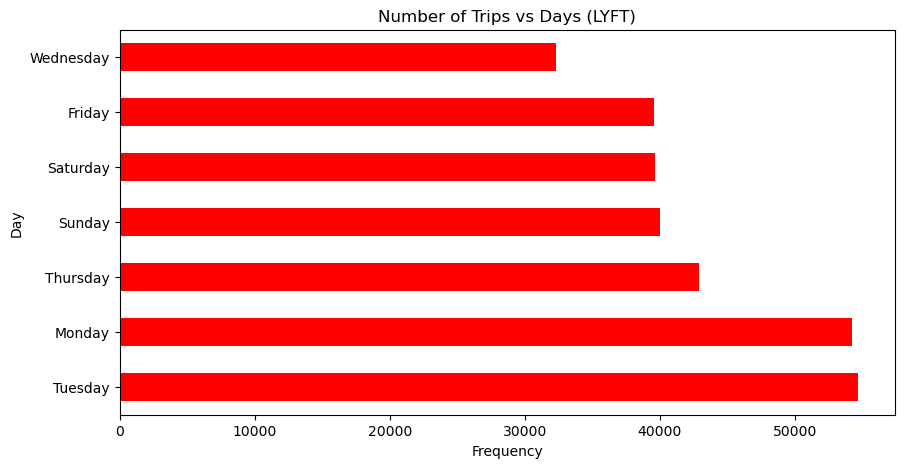

In [37]:
day_week_lyft = [calendar.day_name[x.dayofweek] for x in
            pd.to_datetime(lyft['datetime'], format='%Y/%m/%d %H:%M:%S')]
day_week_lyft = pd.Series(day_week_lyft)

days_lift = day_week_lyft.value_counts()
days_lift.plot(kind='barh', color='red', figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Day')
plt.title('Number of Trips vs Days (LYFT)')

Text(0.5, 1.0, 'Number of Trips vs Days (UBER)')

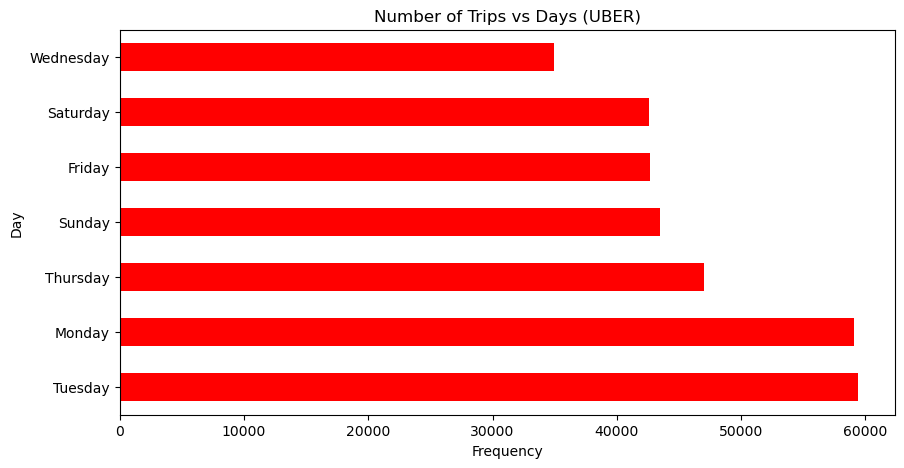

In [38]:
day_week_uber = [calendar.day_name[x.dayofweek] for x in
            pd.to_datetime(uber['datetime'], format='%Y/%m/%d %H:%M:%S')]
day_week_uber = pd.Series(day_week_uber)

days_uber = day_week_uber.value_counts()
days_uber.plot(kind='barh', color='red', figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Day')
plt.title('Number of Trips vs Days (UBER)')

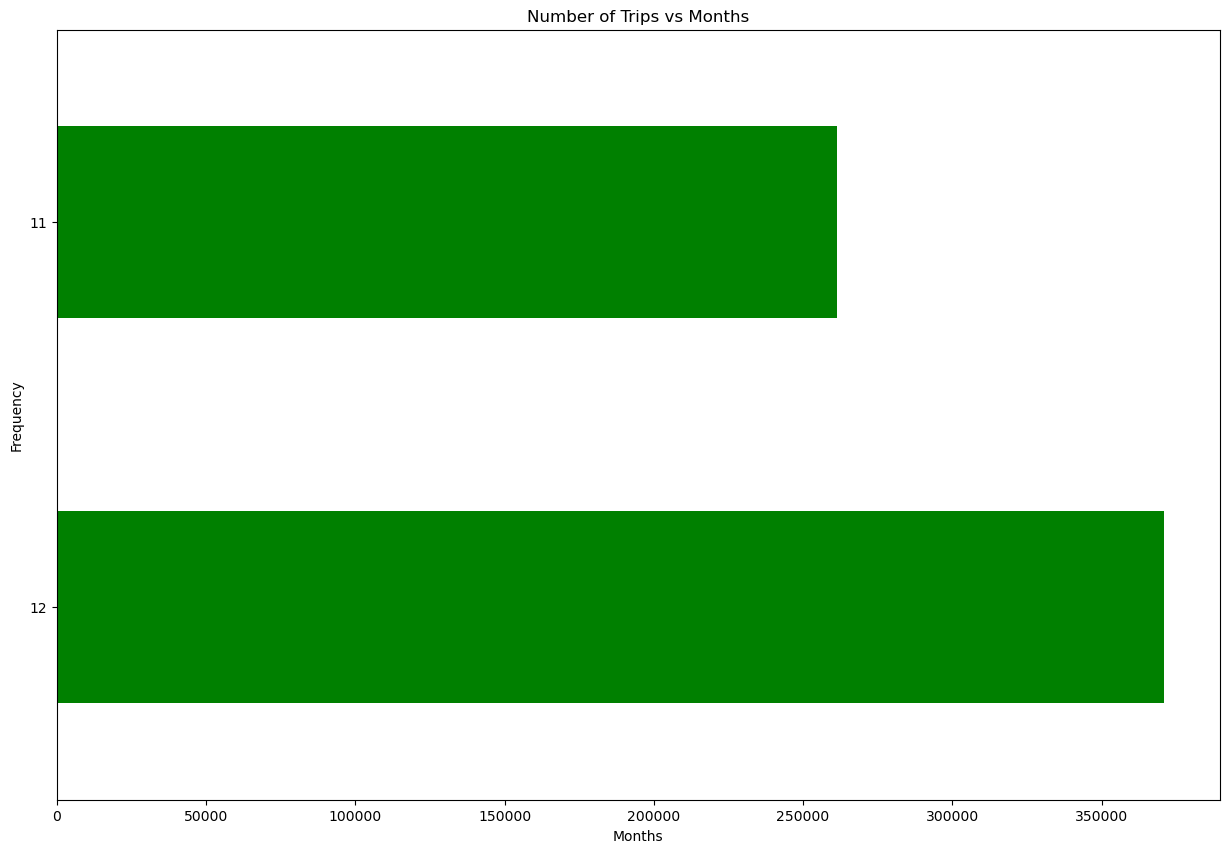

In [39]:
# Jumlah perjalanan/pemesanan menggunakan lyft dan uber
dfm = df_1.value_counts('month')
dfm.plot(kind = 'barh', figsize=(15,10), color='green')

plt.title('Number of Trips vs Months')
plt.xlabel('Months')
plt.ylabel('Frequency')

plt.show()

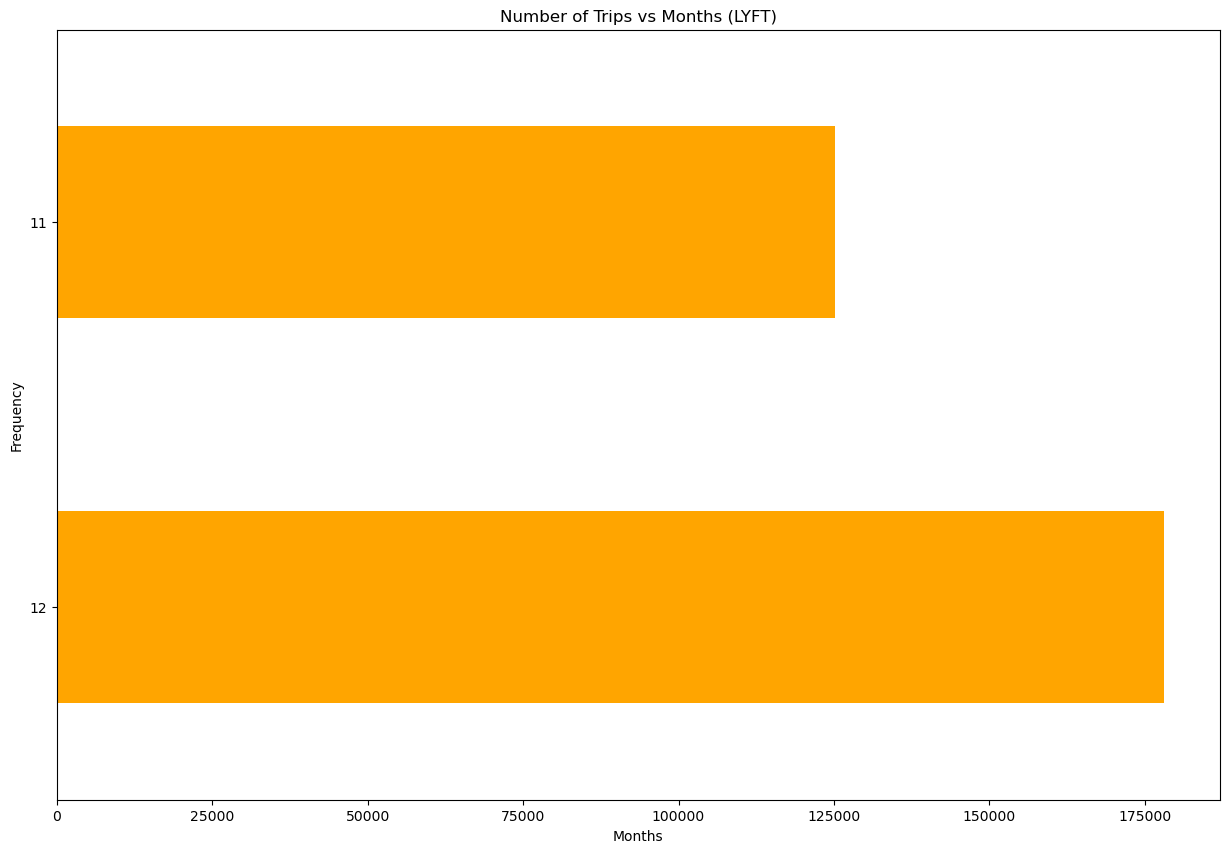

In [40]:
# Jumlah perjalanan/pemesanan menggunakan lyft
dfm_lyft = lyft.value_counts('month')
dfm_lyft.plot(kind = 'barh', figsize=(15,10), color='orange')

plt.title('Number of Trips vs Months (LYFT)')
plt.xlabel('Months')
plt.ylabel('Frequency')

plt.show()

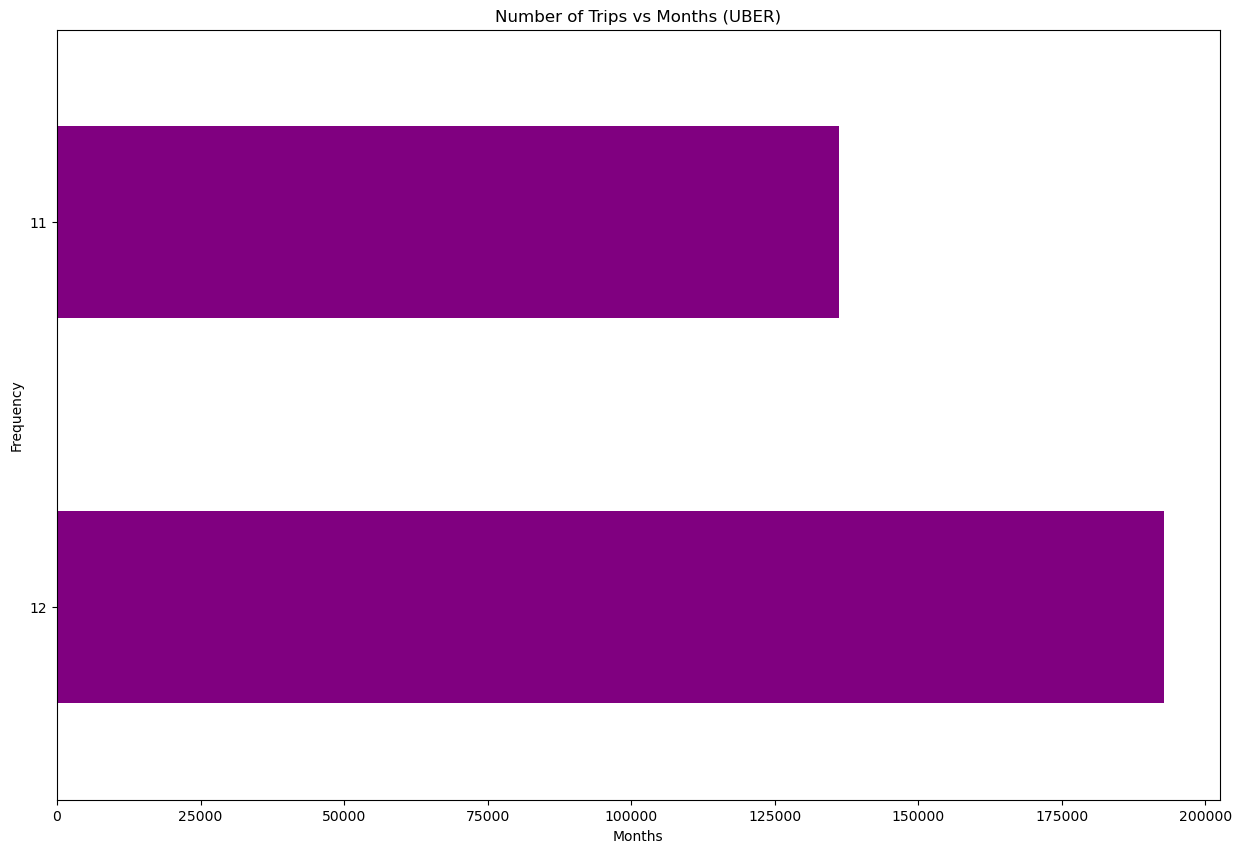

In [41]:
# Jumlah perjalanan/pemesanan menggunakan uber
dfm_uber = uber.value_counts('month')
dfm_uber.plot(kind = 'barh', figsize=(15,10), color='purple')

plt.title('Number of Trips vs Months (UBER)')
plt.xlabel('Months')
plt.ylabel('Frequency')

plt.show()

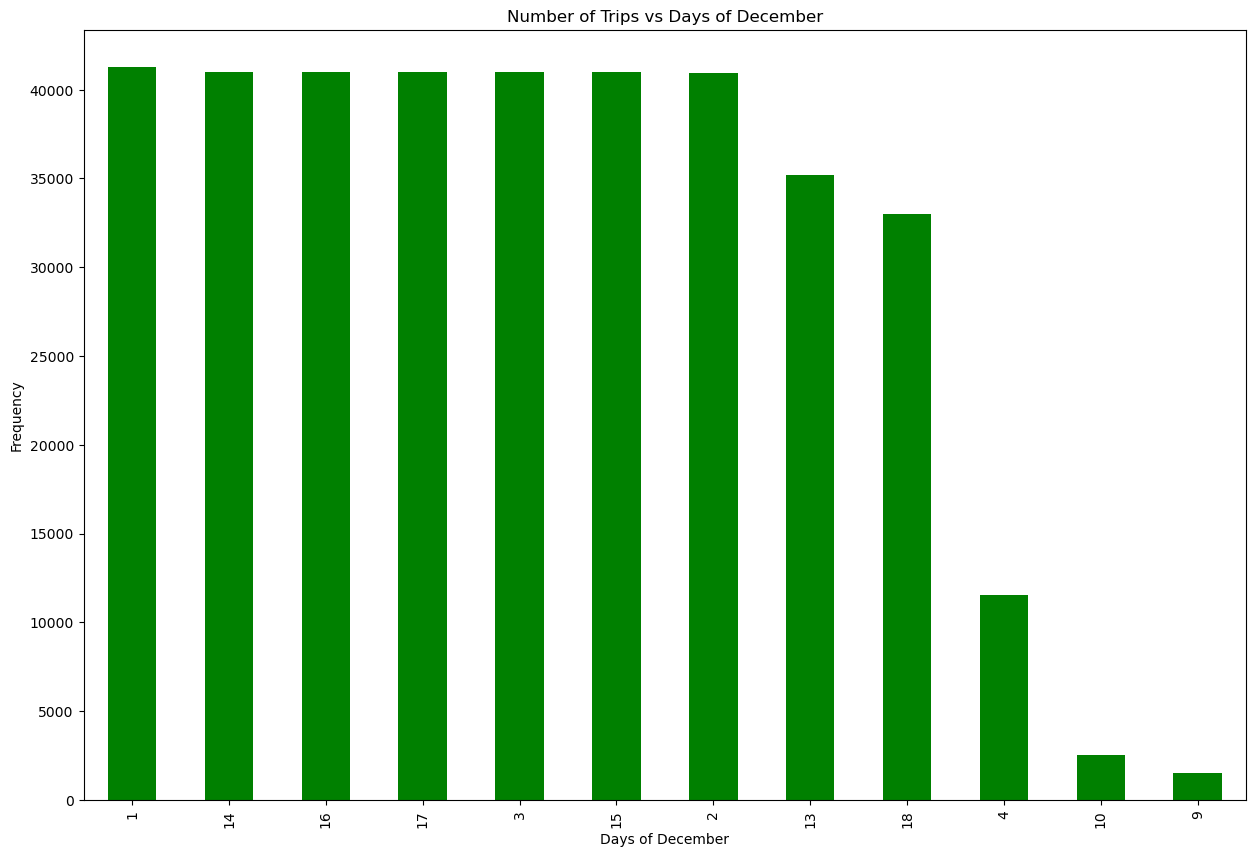

In [42]:
day_dec = df_1[df_1['month'] == 12].value_counts('day')
day_dec.sort_values(ascending=True)

day_dec.plot(kind = 'bar', figsize=(15,10), color='green')

plt.title('Number of Trips vs Days of December')
plt.xlabel('Days of December')
plt.ylabel('Frequency')

plt.show()

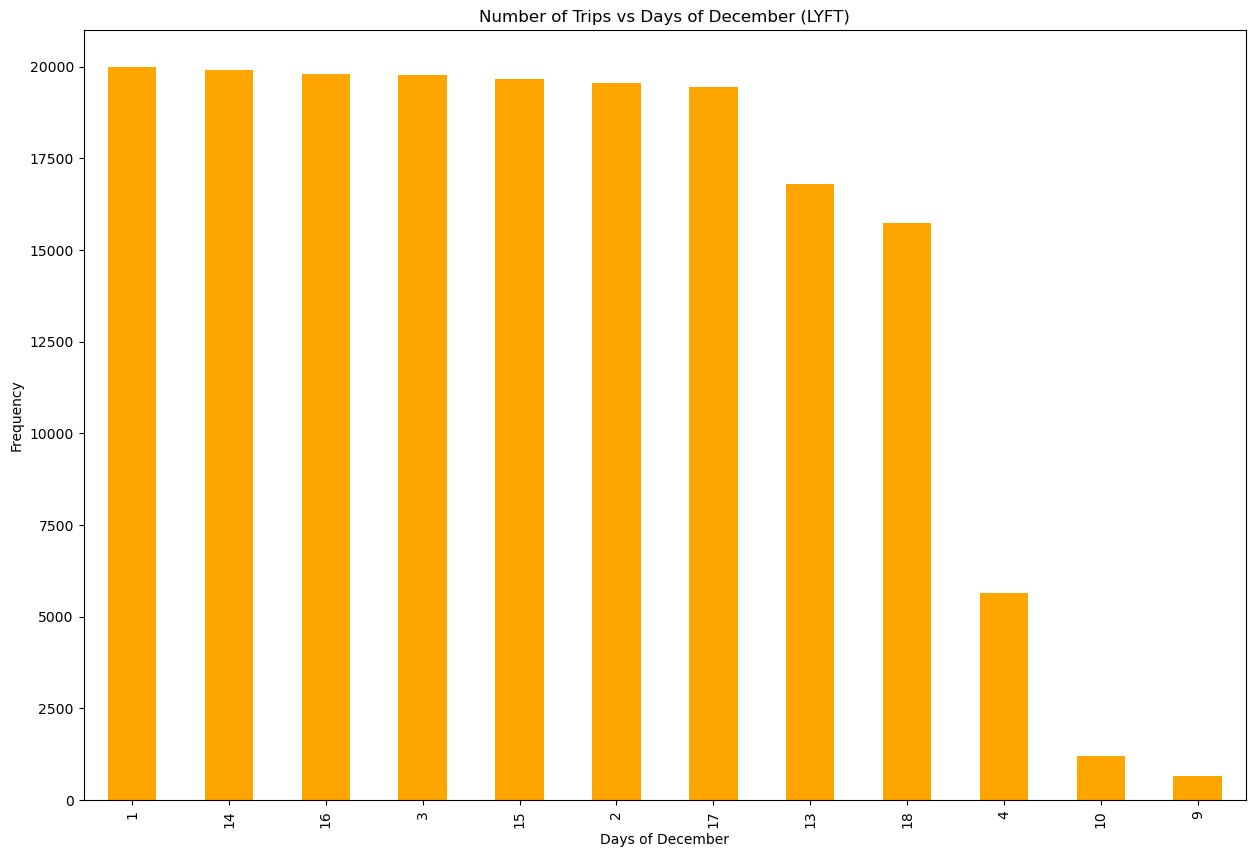

In [43]:
day_dec_lyft = lyft[lyft['month'] == 12].value_counts('day')
day_dec_lyft.sort_values(ascending=True)

day_dec_lyft.plot(kind = 'bar', figsize=(15,10), color='orange')

plt.title('Number of Trips vs Days of December (LYFT)')
plt.xlabel('Days of December')
plt.ylabel('Frequency')

plt.show()

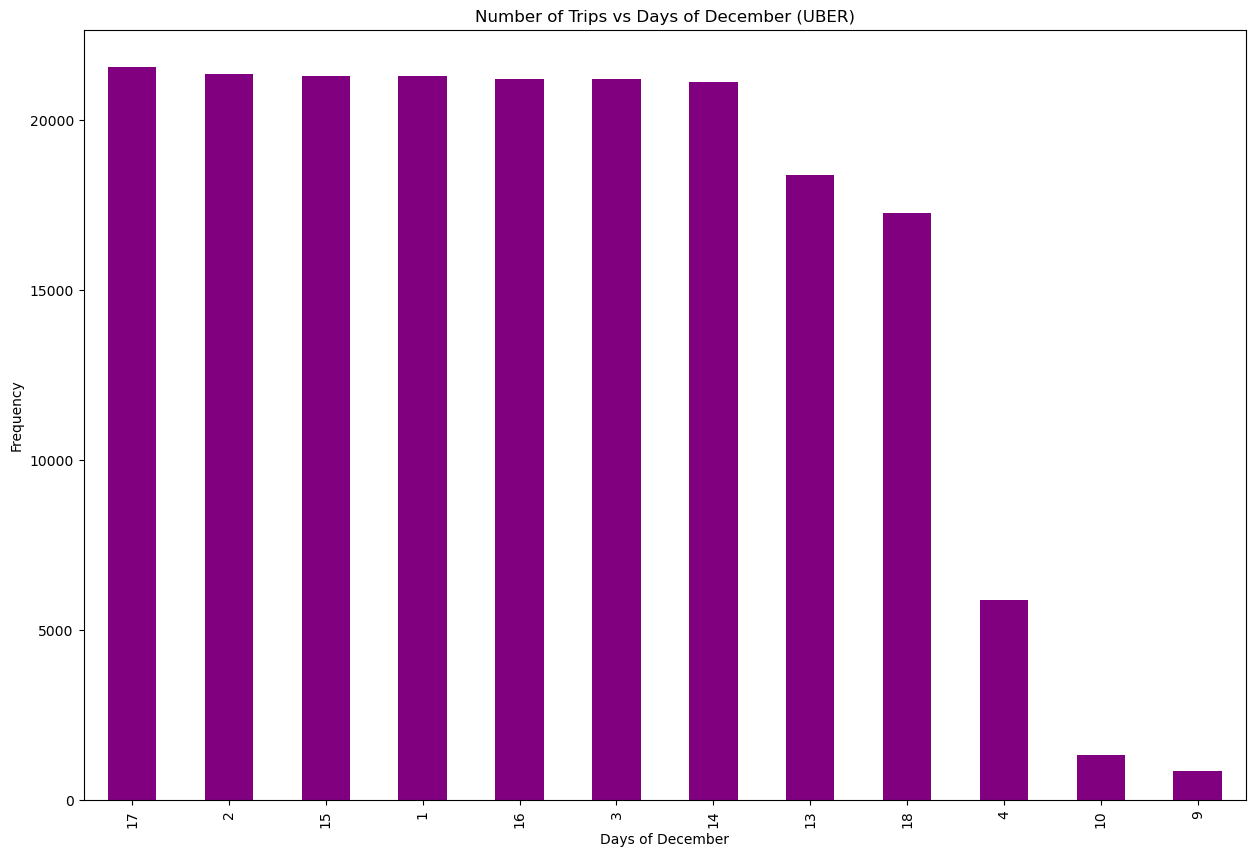

In [44]:
day_dec_uber = uber[uber['month'] == 12].value_counts('day')
day_dec_uber.sort_values(ascending=True)

day_dec_uber.plot(kind = 'bar', figsize=(15,10), color='purple')

plt.title('Number of Trips vs Days of December (UBER)')
plt.xlabel('Days of December')
plt.ylabel('Frequency')

plt.show()

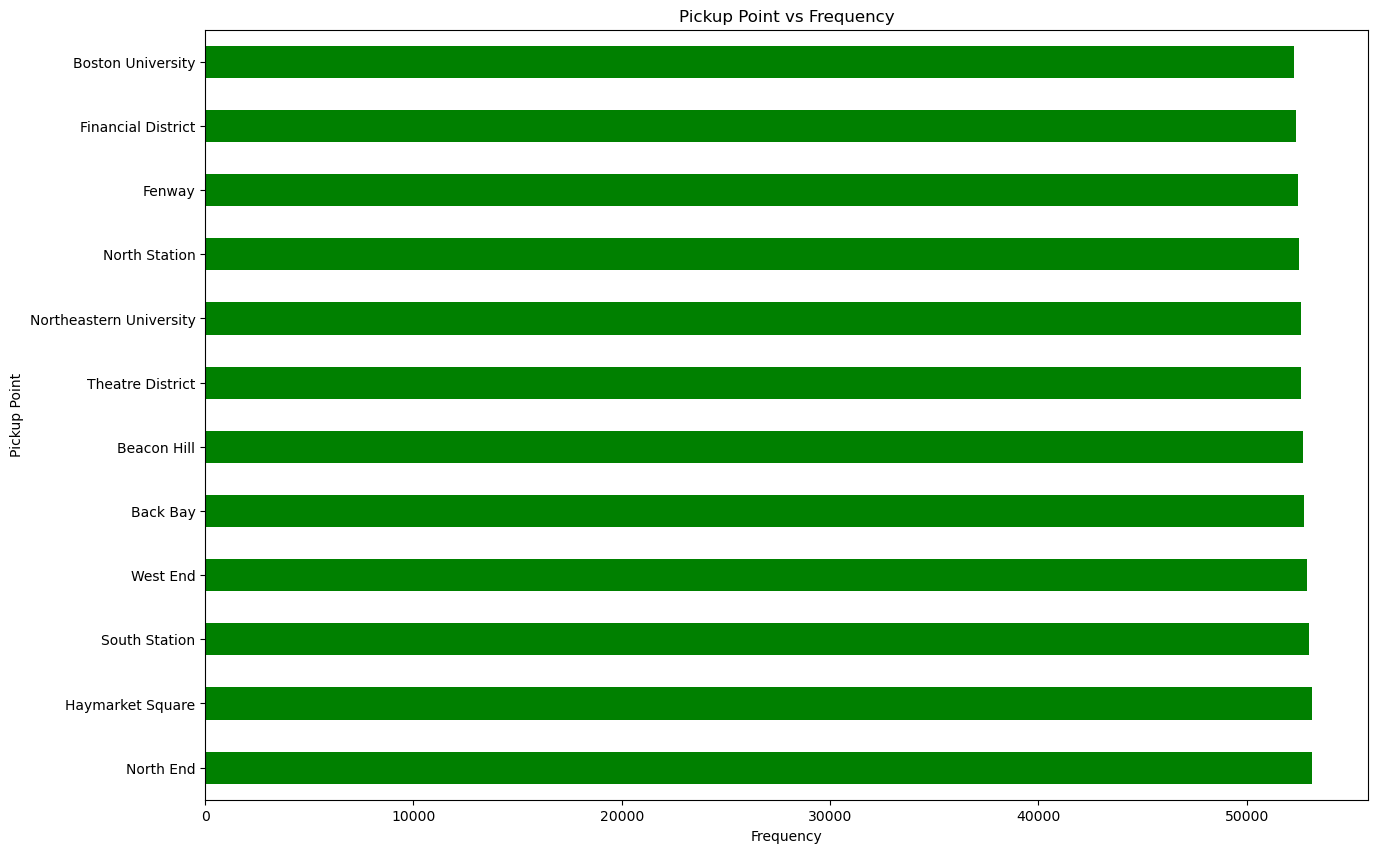

Nilai Freq Terbanyak :  53147


In [45]:
dfs = df_1.value_counts('source')
dfs.sort_values(ascending=True)

dfs.plot(kind = 'barh', figsize=(15,10), color='green')

plt.title('Pickup Point vs Frequency')
plt.xlabel('Frequency')
plt.ylabel('Pickup Point')

plt.show()

print('Nilai Freq Terbanyak : ', dfs.max())

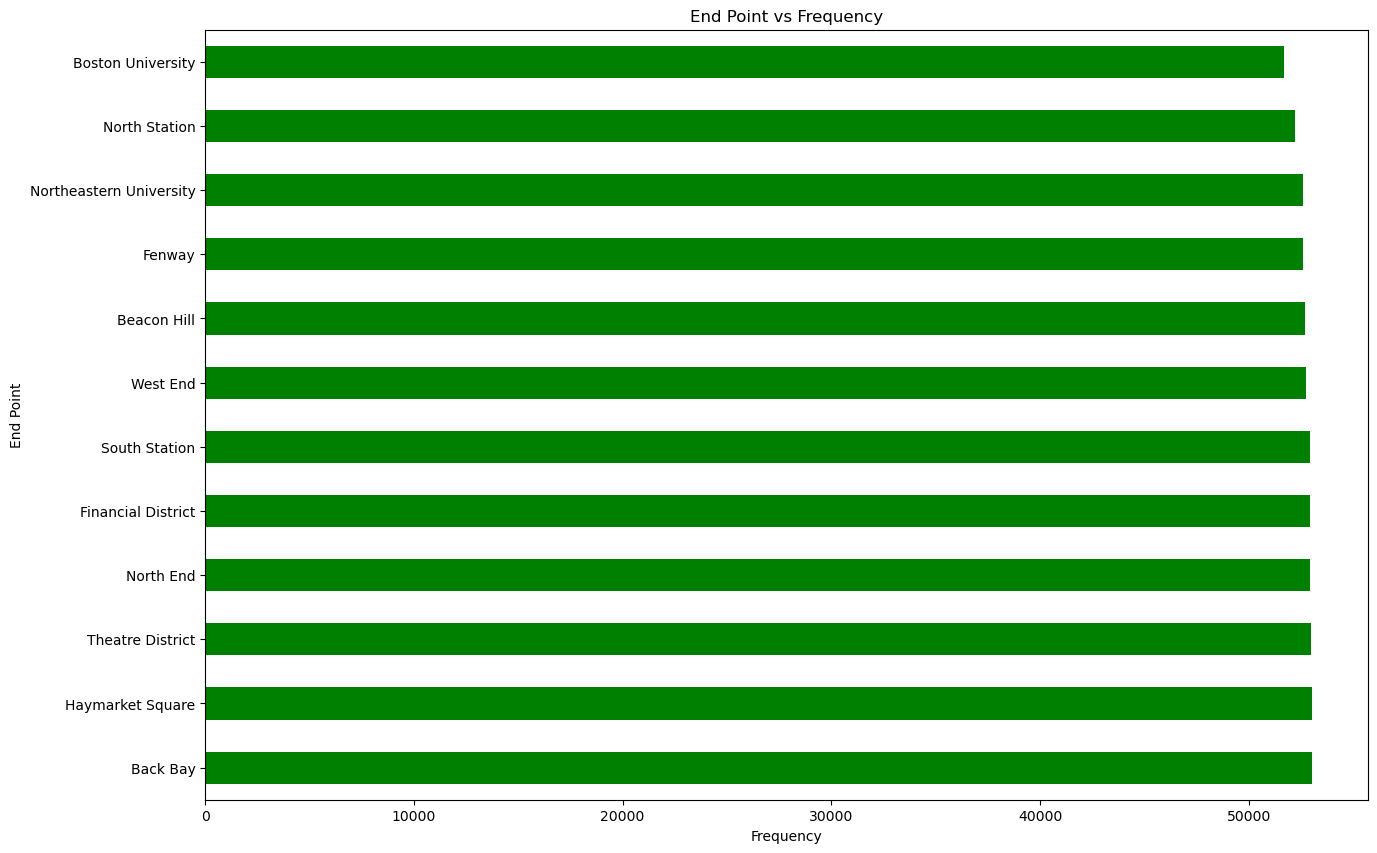

Nilai Freq Terbanyak :  53043


In [46]:
dfd = df_1.value_counts('destination')
dfd.sort_values(ascending=True)

dfd.plot(kind = 'barh', figsize=(15,10), color='green')

plt.title('End Point vs Frequency')
plt.xlabel('Frequency')
plt.ylabel('End Point')

plt.show()

print('Nilai Freq Terbanyak : ', dfd.max())

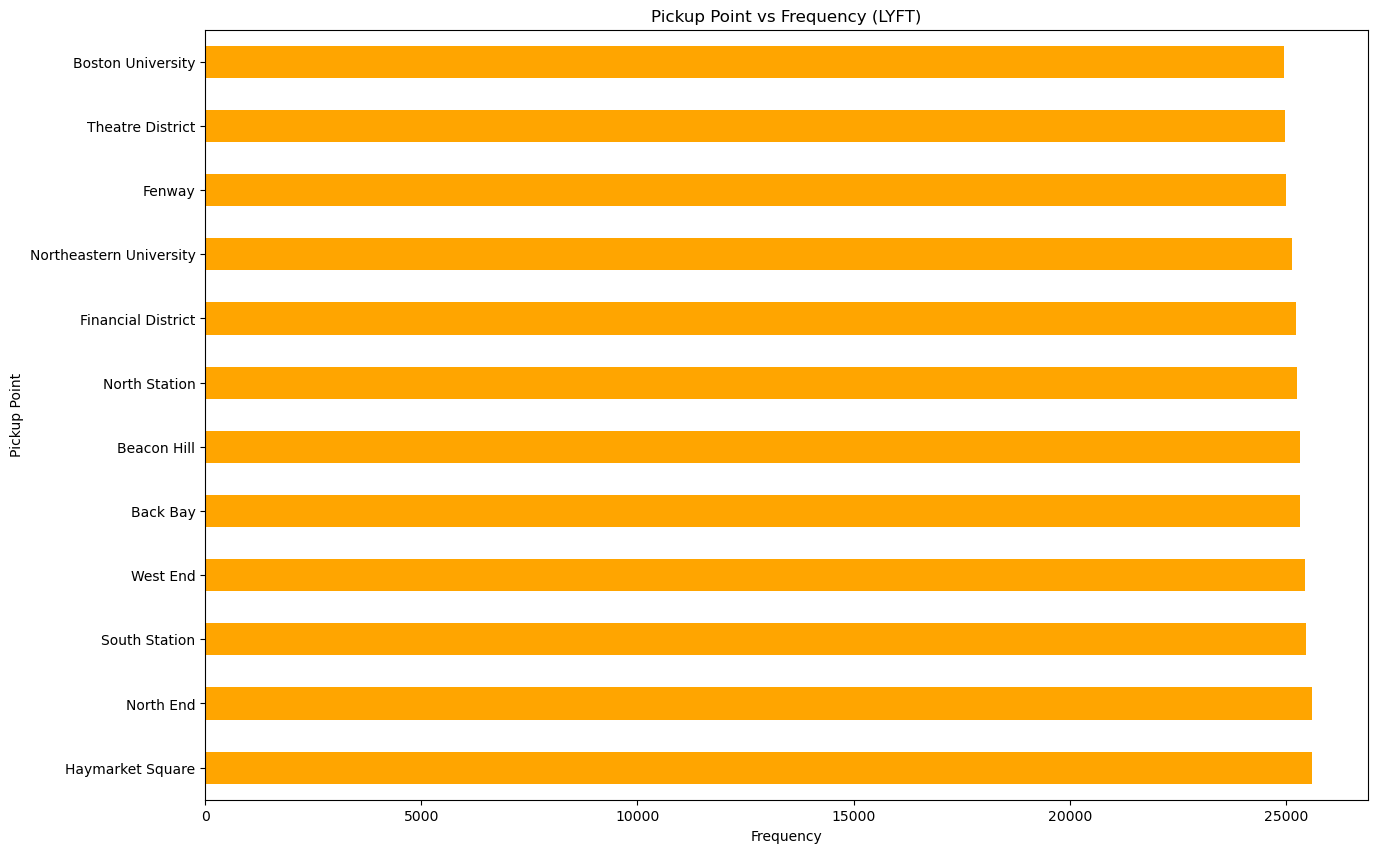

Nilai Freq Terbanyak :  25609


In [47]:
dfs_lyft = lyft.value_counts('source')
dfs_lyft.sort_values(ascending=True)

dfs_lyft.plot(kind = 'barh', figsize=(15,10), color='orange')

plt.title('Pickup Point vs Frequency (LYFT)')
plt.xlabel('Frequency')
plt.ylabel('Pickup Point')

plt.show()

print('Nilai Freq Terbanyak : ', dfs_lyft.max())

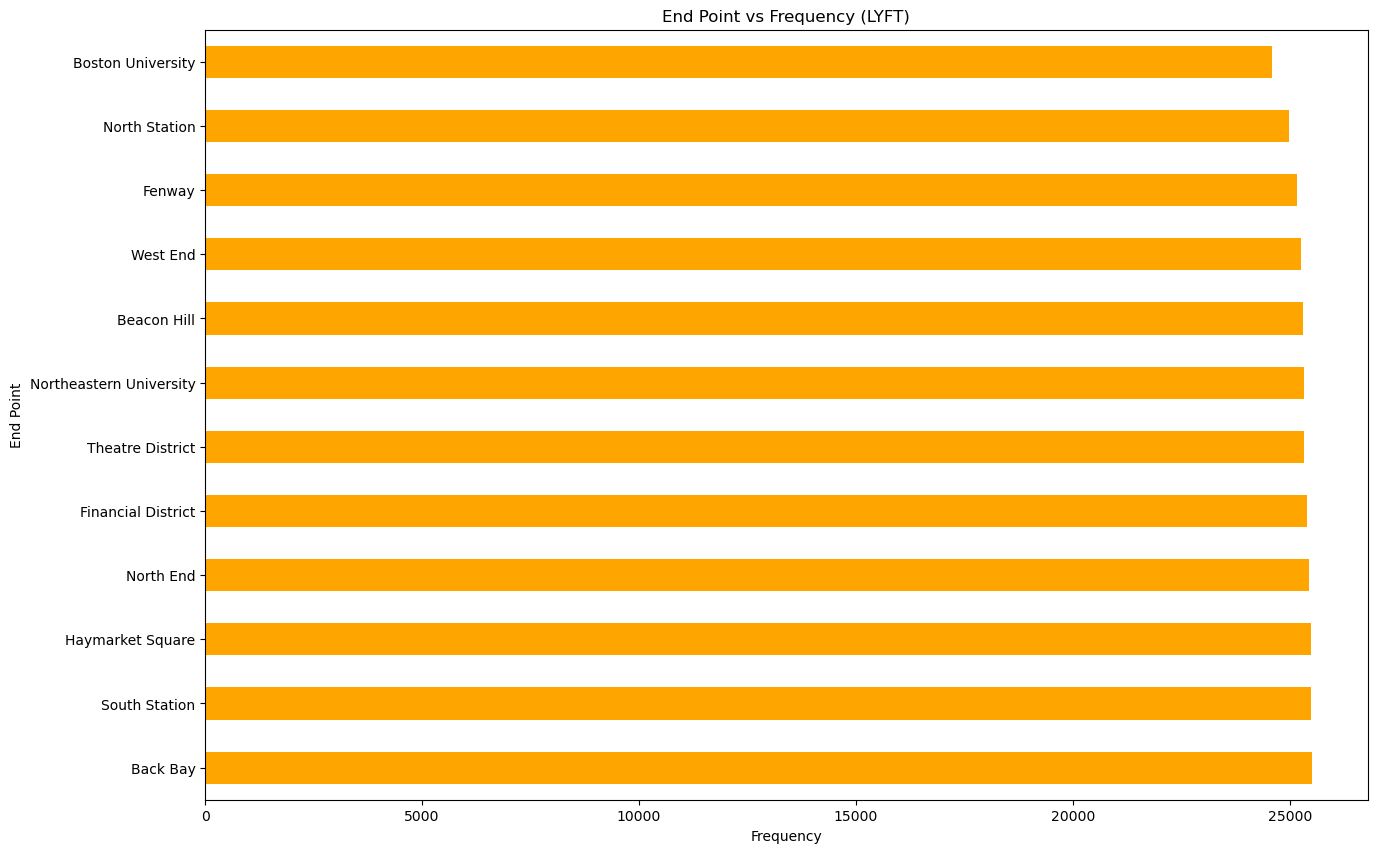

Nilai Freq Terbanyak :  25517


In [48]:
dfd_lyft = lyft.value_counts('destination')
dfd_lyft.sort_values(ascending=True)

dfd_lyft.plot(kind = 'barh', figsize=(15,10), color='orange')

plt.title('End Point vs Frequency (LYFT)')
plt.xlabel('Frequency')
plt.ylabel('End Point')

plt.show()

print('Nilai Freq Terbanyak : ', dfd_lyft.max())

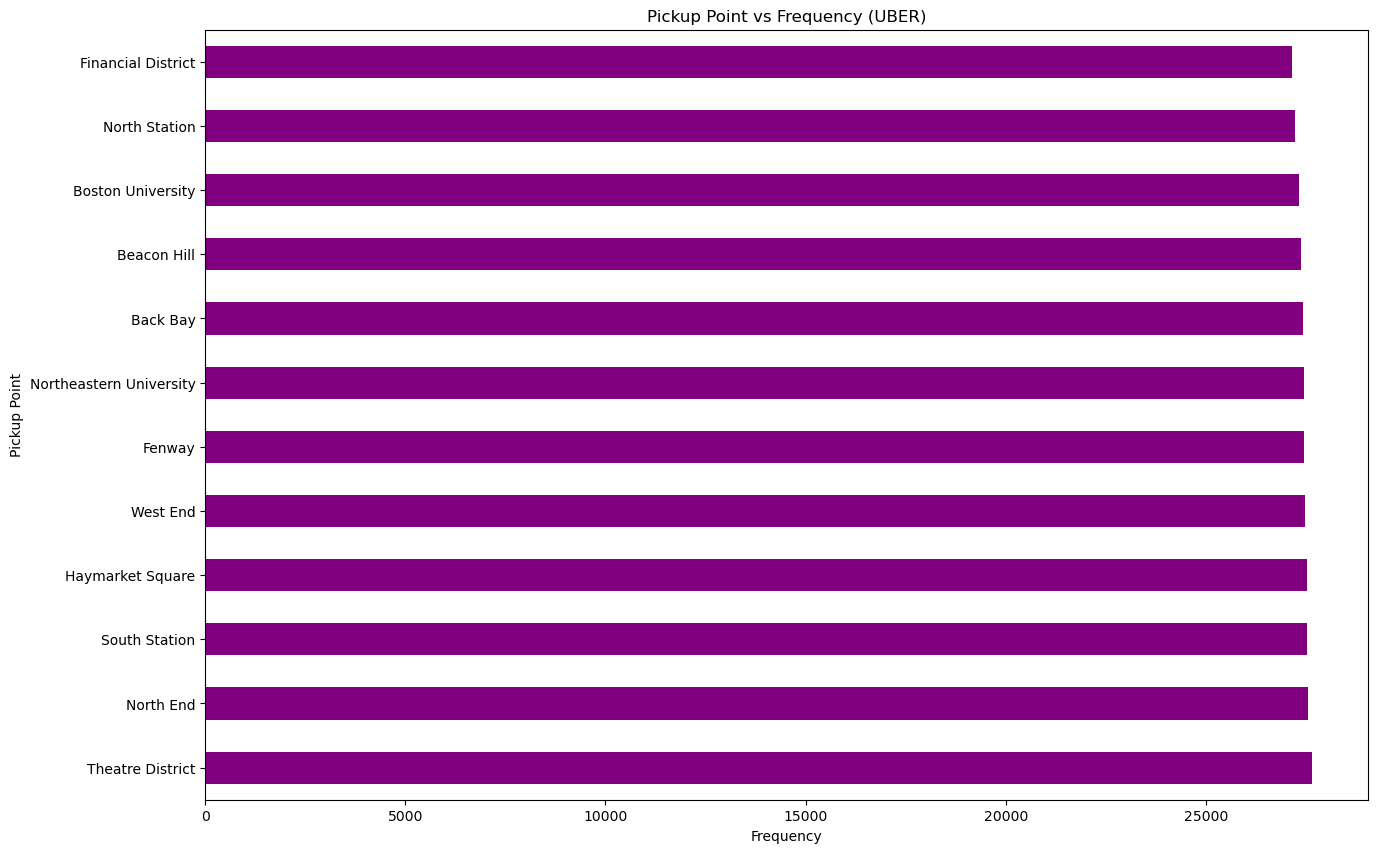

Nilai Freq Terbanyak :  27655


In [49]:
dfs_uber = uber.value_counts('source')
dfs_uber.sort_values(ascending=True)

dfs_uber.plot(kind = 'barh', figsize=(15,10), color='purple')

plt.title('Pickup Point vs Frequency (UBER)')
plt.xlabel('Frequency')
plt.ylabel('Pickup Point')

plt.show()

print('Nilai Freq Terbanyak : ', dfs_uber.max())

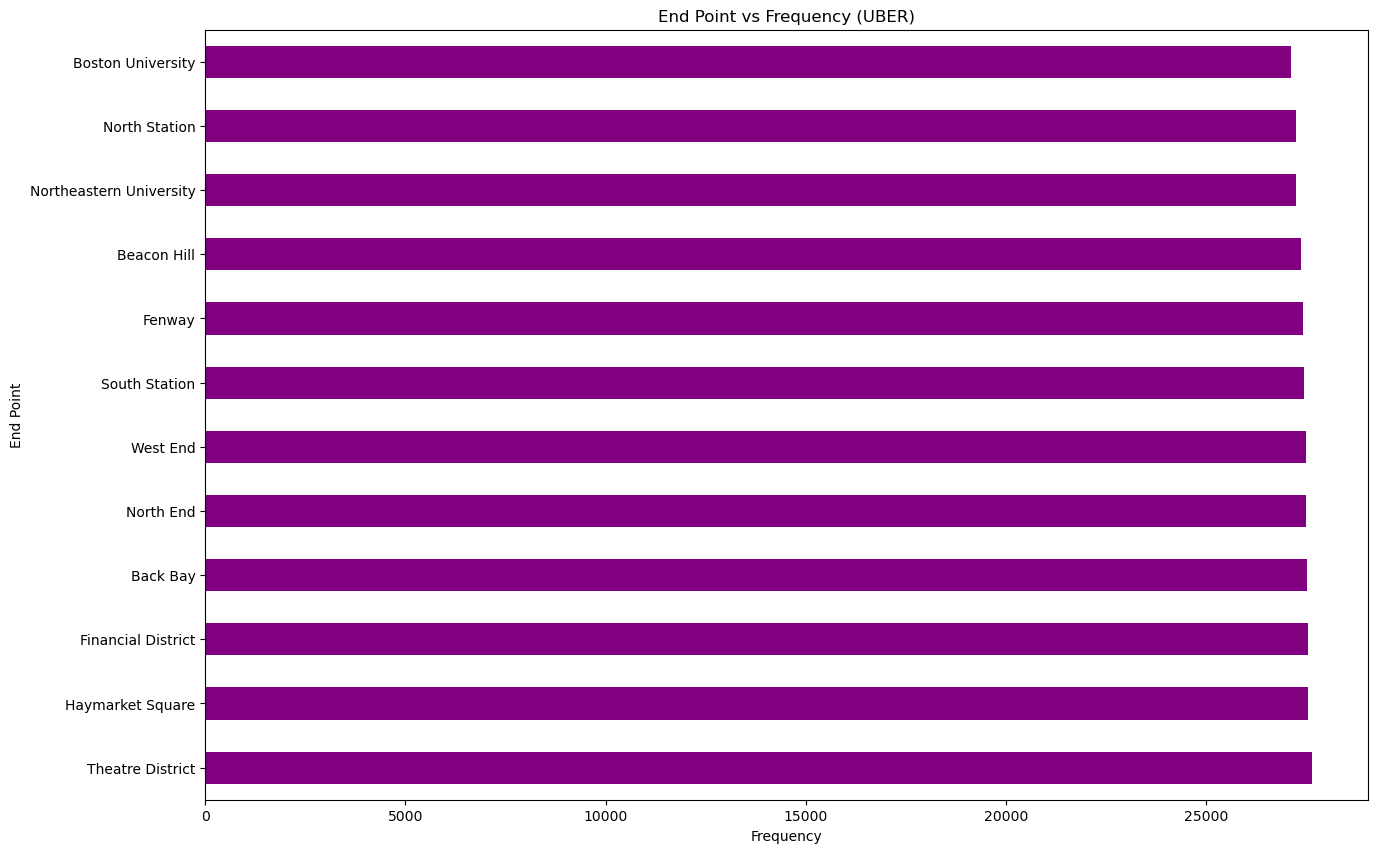

Nilai Freq Terbanyak :  27649


In [50]:
dfd_uber = uber.value_counts('destination')
dfd_uber.sort_values(ascending=True)

dfd_uber.plot(kind = 'barh', figsize=(15,10), color='purple')

plt.title('End Point vs Frequency (UBER)')
plt.xlabel('Frequency')
plt.ylabel('End Point')

plt.show()

print('Nilai Freq Terbanyak : ', dfd_uber.max())

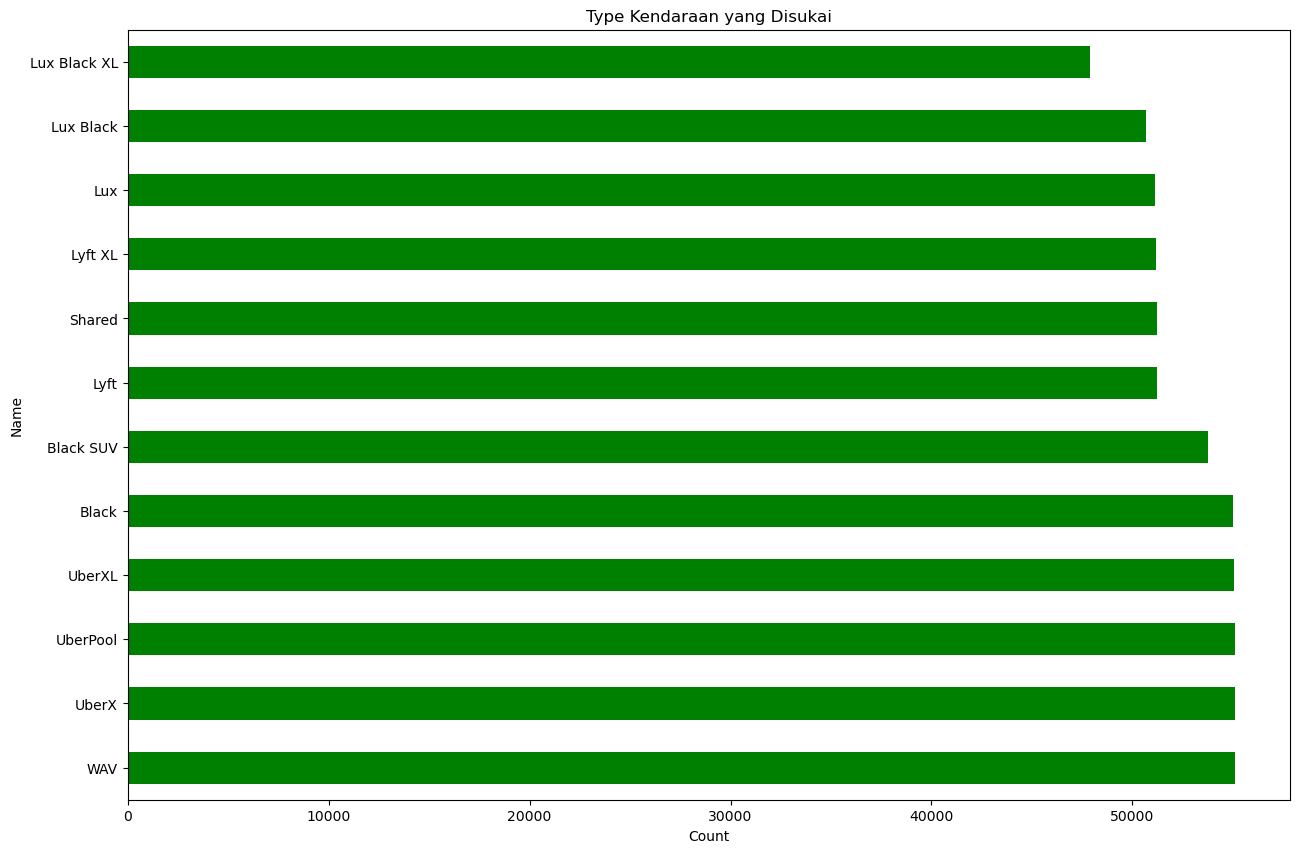

Nilai Freq Terbanyak :  55095


In [51]:
dfnm = df_1.value_counts('name')
dfnm.sort_values(ascending=True)

dfnm.plot(kind = 'barh', figsize=(15,10), color='green')

plt.title('Type Kendaraan yang Disukai')
plt.xlabel('Count')
plt.ylabel('Name')

plt.show()

print('Nilai Freq Terbanyak : ', dfnm.max())

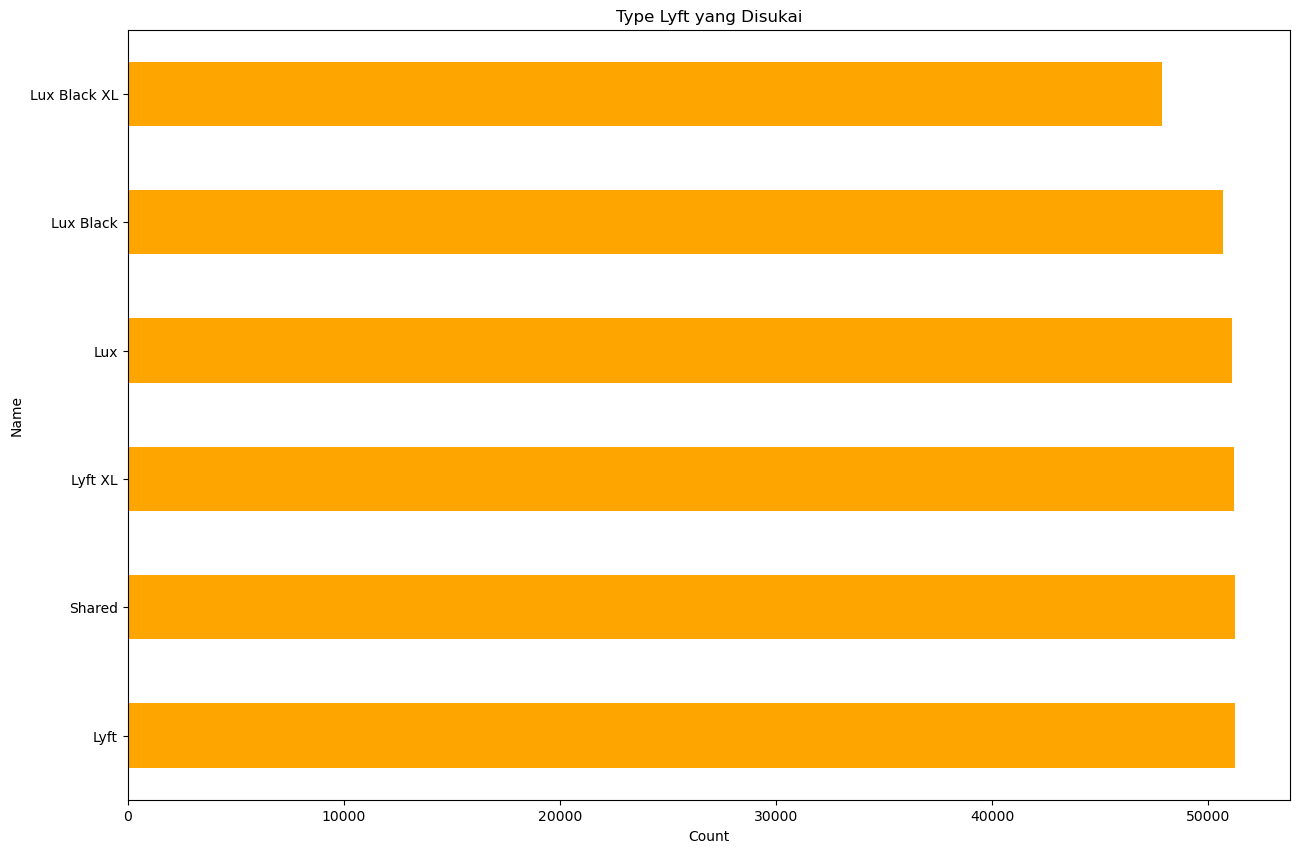

Nilai Freq Terbanyak :  55095


In [52]:
dfnm_lyft = lyft.value_counts('name')
dfnm_lyft.sort_values(ascending=True)

dfnm_lyft.plot(kind = 'barh', figsize=(15,10), color='orange')

plt.title('Type Lyft yang Disukai')
plt.xlabel('Count')
plt.ylabel('Name')

plt.show()

print('Nilai Freq Terbanyak : ', dfnm.max())

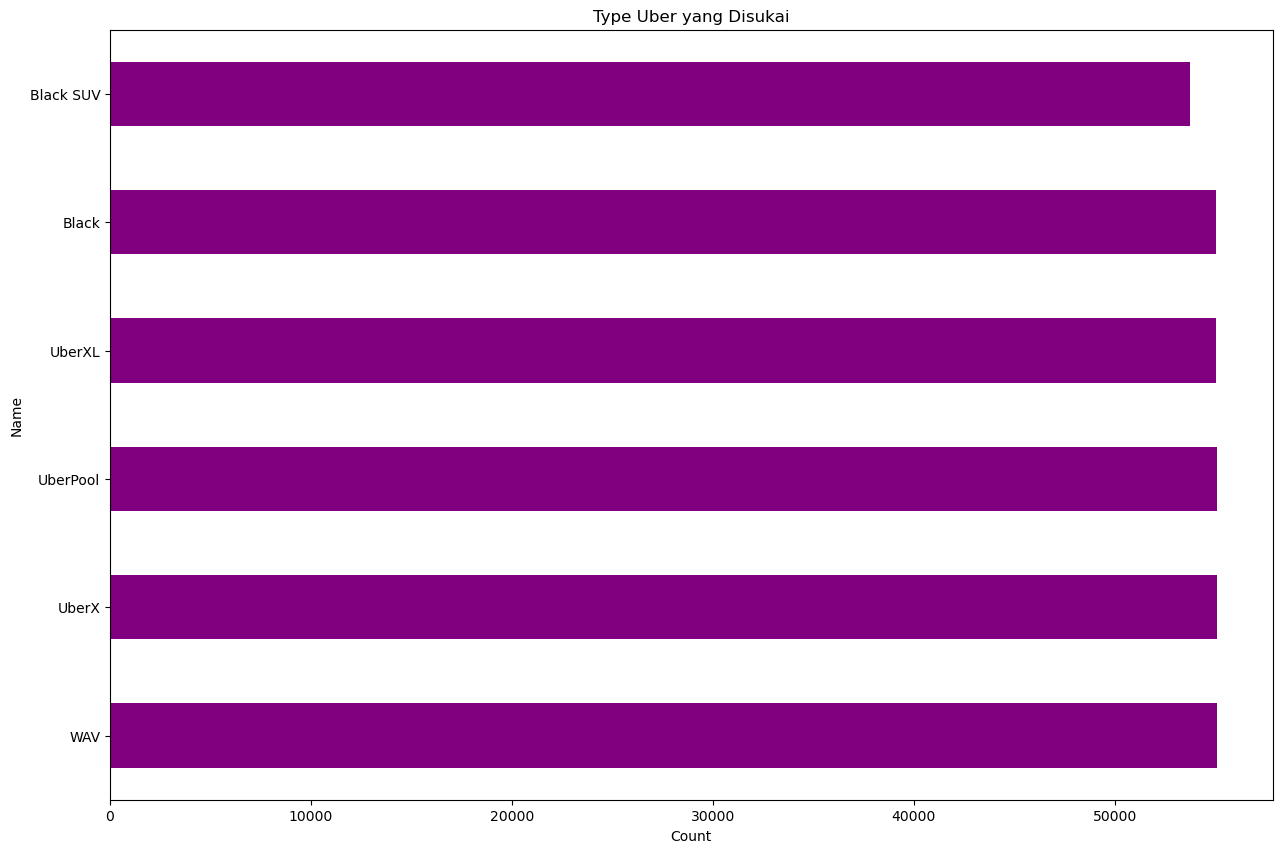

Nilai Freq Terbanyak :  55095


In [53]:
dfnm_uber = uber.value_counts('name')
dfnm_uber.sort_values(ascending=True)

dfnm_uber.plot(kind = 'barh', figsize=(15,10), color='purple')

plt.title('Type Uber yang Disukai')
plt.xlabel('Count')
plt.ylabel('Name')

plt.show()

print('Nilai Freq Terbanyak : ', dfnm.max())

In [54]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632387 entries, 0 to 693070
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 632387 non-null  object 
 1   timestamp          632387 non-null  float64
 2   hour               632387 non-null  int64  
 3   day                632387 non-null  int64  
 4   month              632387 non-null  int64  
 5   datetime           632387 non-null  object 
 6   source             632387 non-null  object 
 7   destination        632387 non-null  object 
 8   cab_type           632387 non-null  object 
 9   name               632387 non-null  object 
 10  price              632387 non-null  float64
 11  distance           632387 non-null  float64
 12  surge_multiplier   632387 non-null  float64
 13  latitude           632387 non-null  float64
 14  longitude          632387 non-null  float64
 15  temperature        632387 non-null  float64
 16  sh

In [55]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [56]:
df_1['id'] = label_encoder.fit_transform(df_1['id'])
df_1['datetime'] = label_encoder.fit_transform(df_1['datetime'])
df_1['destination'] = label_encoder.fit_transform(df_1['destination'])
df_1['short_summary'] = label_encoder.fit_transform(df_1['short_summary'])
df_1['long_summary'] = label_encoder.fit_transform(df_1['long_summary'])
df_1['name'] = label_encoder.fit_transform(df_1['name'])

In [57]:
print('Class Mapping of Name: ')
for i, item in enumerate(label_encoder.classes_):
    print(item, '==>', i)

Class Mapping of Name: 
Black ==> 0
Black SUV ==> 1
Lux ==> 2
Lux Black ==> 3
Lux Black XL ==> 4
Lyft ==> 5
Lyft XL ==> 6
Shared ==> 7
UberPool ==> 8
UberX ==> 9
UberXL ==> 10
WAV ==> 11


In [58]:
df_1['source'] = label_encoder.fit_transform(df_1['source'])

print('Class Mapping of Source: ')
for i, item in enumerate(label_encoder.classes_):
    print(item, '==>', i)

Class Mapping of Source: 
Back Bay ==> 0
Beacon Hill ==> 1
Boston University ==> 2
Fenway ==> 3
Financial District ==> 4
Haymarket Square ==> 5
North End ==> 6
North Station ==> 7
Northeastern University ==> 8
South Station ==> 9
Theatre District ==> 10
West End ==> 11


In [59]:
df_1['icon'] = label_encoder.fit_transform(df_1['icon'])

print('Class Mapping of Icon: ')
for i, item in enumerate(label_encoder.classes_):
    print(item, '==>', i)

Class Mapping of Icon: 
 clear-day  ==> 0
 clear-night  ==> 1
 cloudy  ==> 2
 fog  ==> 3
 partly-cloudy-day  ==> 4
 partly-cloudy-night  ==> 5
 rain  ==> 6


In [60]:
df_1['cab_type'] = label_encoder.fit_transform(df_1['cab_type'])

print('Class Mapping of cab_type: ')
for i, item in enumerate(label_encoder.classes_):
    print(item, '==>', i)

Class Mapping of cab_type: 
Lyft ==> 0
Uber ==> 1


In [61]:
len(df_1[df_1['cab_type']==1])

329071

In [62]:
X = df_1[df_1['cab_type']==1].drop(['price', 'cab_type'], axis=1)
y = df_1[df_1['cab_type']==1]['price']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

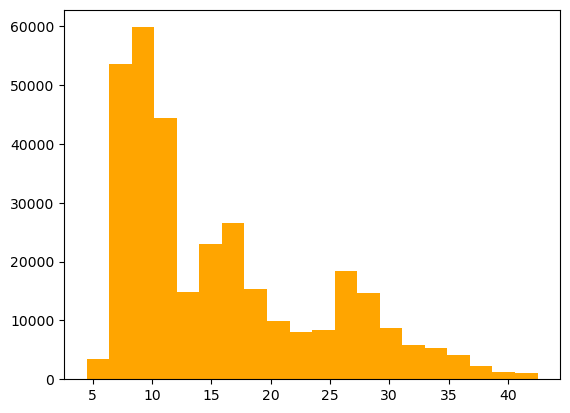

In [64]:
plt.hist(y, bins=20, color='orange')
plt.show()

In [65]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import ensemble

In [66]:
def train_test_models(X_train, y_train, X_test, y_test):
    print('LinearRegression...')
    lr_model = LinearRegression()
    lr_model = lr_model.fit(X_train, y_train)
    print(lr_model.score(X_test, y_test))

    print('Decision Tree...')
    dt_model = DecisionTreeRegressor(random_state=0, max_depth=10)
    dt_model.fit(X_train, y_train)
    print(dt_model.score(X_test, y_test))

    print('Random Forest...')
    random_forest = RandomForestRegressor(n_estimators=20, random_state=0)
    random_forest.fit(X_train, y_train)
    print(random_forest.score(X_test, y_test))

    print('GBM...')
    gbm = ensemble.GradientBoostingRegressor(n_estimators=200, max_depth=5)
    gbm.fit(X_train, y_train)
    print(gbm.score(X_test, y_test))

    return [lr_model, dt_model, random_forest, gbm]

In [67]:
def feature_eliminate(trained_model, X, y, n_features=40):
    rfe = RFE(trained_model, n_features_to_select=n_features)
    rfe = rfe.fit(X, y)
    X_new = X[X.columns[rfe.support_]]
    X_train, X_test, y_train, y_test = train_test_split(X_new, y,
                                                        test_size=0.2,
                                                        random_state=0)
    new_fit = trained_model.fit(X_train, y_train)
    print(new_fit.score(X_test, y_test))

In [68]:
model_list = train_test_models(X_train, y_train, X_test, y_test)

n_features = [5, 10, 15, 20]

for model in model_list:
    for nf in n_features:
        print(f'{model}->{nf} features')
        feature_eliminate(model, X, y, nf)

LinearRegression...
0.6468506272818589
Decision Tree...
0.9529072932467096
Random Forest...
0.9466137549281692
GBM...
0.9547920547173584
LinearRegression()->5 features
0.6452753633993861
LinearRegression()->10 features
0.6452728197235048
LinearRegression()->15 features
0.645254008604106
LinearRegression()->20 features
0.6452459751286403
DecisionTreeRegressor(max_depth=10, random_state=0)->5 features
0.9529159906425287
DecisionTreeRegressor(max_depth=10, random_state=0)->10 features
0.9519687231040868
DecisionTreeRegressor(max_depth=10, random_state=0)->15 features
0.9522081991384926
DecisionTreeRegressor(max_depth=10, random_state=0)->20 features
0.9521852898442933
RandomForestRegressor(n_estimators=20, random_state=0)->5 features


KeyboardInterrupt: 